# rf307_fullpereventerrors
Multidimensional models: usage of full pdf with per-event errors




**Author:**  Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Wednesday, May 15, 2024 at 09:50 AM.</small></i>

In [1]:
import ROOT

B-physics pdf with per-event Gaussian resolution
----------------------------------------------------------------------------------------------

Observables

In [2]:
dt = ROOT.RooRealVar("dt", "dt", -10, 10)
dterr = ROOT.RooRealVar("dterr", "per-event error on dt", 0.01, 10)

Build a gaussian resolution model scaled by the per-error =
gauss(dt,bias,sigma*dterr)

In [3]:
bias = ROOT.RooRealVar("bias", "bias", 0, -10, 10)
sigma = ROOT.RooRealVar("sigma", "per-event error scale factor", 1, 0.1, 10)
gm = ROOT.RooGaussModel("gm1", "gauss model scaled bt per-event error", dt, bias, sigma, dterr)

Construct decay(dt) (x) gauss1(dt|dterr)

In [4]:
tau = ROOT.RooRealVar("tau", "tau", 1.548)
decay_gm = ROOT.RooDecay("decay_gm", "decay", dt, tau, gm, type="DoubleSided")

Construct empirical pdf for per-event error
-----------------------------------------------------------------

Use landau pdf to get empirical distribution with long tail

In [5]:
pdfDtErr = ROOT.RooLandau("pdfDtErr", "pdfDtErr", dterr, 1.0, 0.25)
expDataDterr = pdfDtErr.generate({dterr}, 10000)

Construct a histogram pdf to describe the shape of the dtErr distribution

In [6]:
expHistDterr = expDataDterr.binnedClone()
pdfErr = ROOT.RooHistPdf("pdfErr", "pdfErr", {dterr}, expHistDterr)

Construct conditional product decay_dm(dt|dterr)*pdf(dterr)
----------------------------------------------------------------------------------------------------------------------

Construct production of conditional decay_dm(dt|dterr) with empirical
pdfErr(dterr)

In [7]:
model = ROOT.RooProdPdf("model", "model", {pdfErr}, Conditional=({decay_gm}, {dt}))

(Alternatively you could also use the landau shape pdfDtErr)
ROOT.RooProdPdf model("model", "model",pdfDtErr,
ROOT.RooFit.Conditional(decay_gm,dt))

Sample, fit and plot product model
------------------------------------------------------------------

Specify external dataset with dterr values to use model_dm as
conditional pdf

In [8]:
data = model.generate({dt, dterr}, 10000)

Fit conditional decay_dm(dt|dterr)
---------------------------------------------------------------------

Specify dterr as conditional observable

In [9]:
model.fitTo(data, PrintLevel=-1)

<cppyy.gbl.RooFitResult object at 0x(nil)>

[#1] INFO:Fitting -- RooAbsPdf::fitTo(model) fixing normalization set for coefficient determination to observables in data
[#1] INFO:Fitting -- using CPU computation library compiled with -mavx2
[#1] INFO:Fitting -- RooAddition::defaultErrorLevel(nll_model_modelData) Summation contains a RooNLLVar, using its error level
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Plot conditional decay_dm(dt|dterr)
---------------------------------------------------------------------

Make two-dimensional plot of conditional pdf in (dt,dterr)

In [10]:
hh_model = model.createHistogram("hh_model", dt, Binning=50, YVar=dict(var=dterr, Binning=50))
hh_model.SetLineColor(ROOT.kBlue)

Make projection of data an dt

In [11]:
frame = dt.frame(Title="Projection of model(dt|dterr) on dt")
data.plotOn(frame)
model.plotOn(frame)

[#1] INFO:Plotting -- RooAbsReal::plotOn(model) plot on dt integrates over variables (dterr)
[#1] INFO:NumericIntegration -- RooRealIntegral::init([pdfErr_NORM[dterr]_X_decay_gm_NORM[dt]]_Int[dterr]) using numeric integrator RooIntegrator1D to calculate Int(dterr)


Draw all frames on canvas

In [12]:
c = ROOT.TCanvas("rf307_fullpereventerrors", "rf307_fullpereventerrors", 800, 400)
c.Divide(2)
c.cd(1)
ROOT.gPad.SetLeftMargin(0.20)
hh_model.GetZaxis().SetTitleOffset(2.5)
hh_model.Draw("surf")
c.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf307_fullpereventerrors.png")

Info in <TCanvas::Print>: png file rf307_fullpereventerrors.png has been created


Draw all canvases 

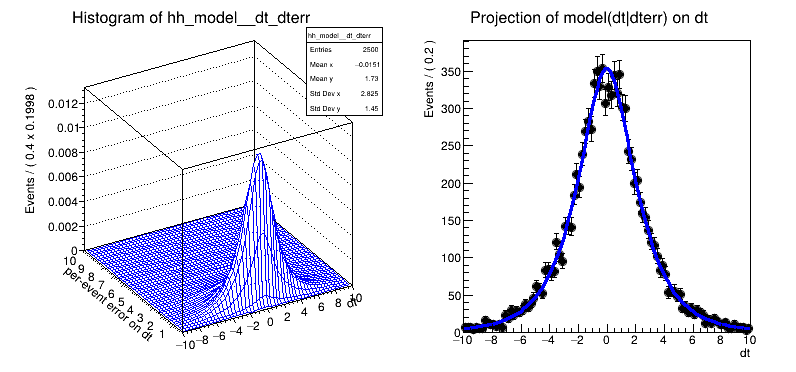

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()